<a href="https://colab.research.google.com/github/fjadidi2001/Artificial_Intelligence_Learning/blob/master/FinalAdvanceAiProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(898, 64)


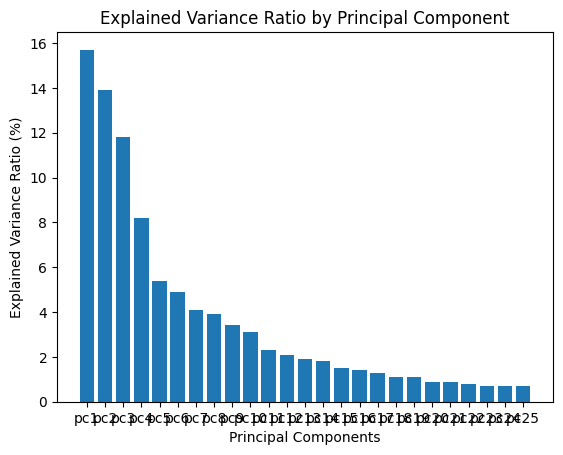

SVM: 0.9866518353726362
Naive Bayes: 0.9276974416017798
LDA: 0.9388209121245829
QDA: 0.9810901001112347
Decision Tree: 0.8520578420467185
Random Forest: 0.9566184649610678
Nearest Neighbors: 0.9799777530589544
Neural Networks: 0.9755283648498332


,score
0,0.986652
1,0.927697
2,0.938821
3,0.981090
4,0.852058
5,0.956618
6,0.979978
7,0.975528


In [ ]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
df = pd.DataFrame(X_train)
print(df.shape)
# Fit and transform data using PCA
pca = PCA(n_components = 25)  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Plot explained variance ratio
pe = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['pc' + str(x) for x in range(1, len(pe) + 1)]
plt.bar(x=range(1, len(pe) + 1), height=pe, tick_label=labels)
plt.ylabel('Explained Variance Ratio (%)')
plt.xlabel('Principal Components')
plt.title("Explained Variance Ratio by Principal Component")
plt.show()


# Define classifiers
names = ["SVM", "Naive Bayes", "LDA", "QDA", "Decision Tree", "Random Forest", "Nearest Neighbors", "Neural Networks"]
classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]
# Perform classification and display scores
s = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    s.append(score)
    print(name + ": " + str(score))

# Display scores in a DataFrame
classify = pd.DataFrame(data=s, columns=['score'])
classify.head(8)




In [ ]:

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Digits dataset
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
names = ["SVM", "Naive Bayes", "LDA", "QDA", "Decision Tree", "Random Forest", "Nearest Neighbors", "Neural Networks"]

# Original Data: Define classifiers and calculate accuracy
original_classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

original_scores = {}
for name, clf in zip(names, original_classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    original_scores[name] = score

# Save original scores to a DataFrame
original_classify = pd.DataFrame(data=original_scores.items(), columns=['Classifier', 'Original Score'])

# Define classifiers for PCA-based classification
pca_classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

# Perform classification with PCA for different values of m
pca_results = {}
components_range = range(2,64,5)  # Adjust the range as needed

for m in components_range:
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    pca_scores = {}
    for name, clf in zip(names, pca_classifiers):
        clf.fit(X_train_pca, y_train)
        score = clf.score(X_test_pca, y_test)
        pca_scores[name] = score

    pca_results[m] = pca_scores

# Save PCA results to a DataFrame
pca_classify = pd.DataFrame({f'PCA-{m} Components': scores for m, scores in pca_results.items()})

# Display original and PCA scores in a DataFrame
combined_classify = pd.concat([original_classify, pca_classify], axis=1)

# Save the combined results to a CSV file
combined_classify.to_csv('classification_results_combined.csv', index=False)
# draw a table
pca_classify.head(7)


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,PCA-2 Components,PCA-7 Components,PCA-12 Components,PCA-17 Components,PCA-22 Components,PCA-27 Components,PCA-32 Components,PCA-37 Components,PCA-42 Components,PCA-47 Components,PCA-52 Components,PCA-57 Components,PCA-62 Components
SVM,0.637375,0.951057,0.981090,0.986652,0.985539,0.986652,0.987764,0.987764,0.991101,0.988877,0.989989,0.989989,0.989989
Naive Bayes,0.619577,0.863181,0.908788,0.932147,0.935484,0.932147,0.933259,0.938821,0.935484,0.926585,0.918799,0.907675,0.890990
LDA,0.581758,0.856507,0.914349,0.929922,0.936596,0.936596,0.951057,0.944383,0.947720,0.945495,0.945495,0.943270,0.939933
QDA,0.631813,0.929922,0.969967,0.981090,0.981090,0.977753,0.975528,0.976641,0.973304,0.948832,0.916574,0.907675,0.890990
Decision Tree,0.558398,0.823137,0.845384,0.828699,0.840934,0.829811,0.826474,0.829811,0.834260,0.818687,0.808676,0.826474,0.832036
Random Forest,0.599555,0.916574,0.947720,0.958843,0.961068,0.955506,0.959956,0.957731,0.948832,0.964405,0.954394,0.956618,0.959956
Nearest Neighbors,0.618465,0.947720,0.971079,0.977753,0.981090,0.978865,0.979978,0.979978,0.978865,0.977753,0.977753,0.977753,0.977753


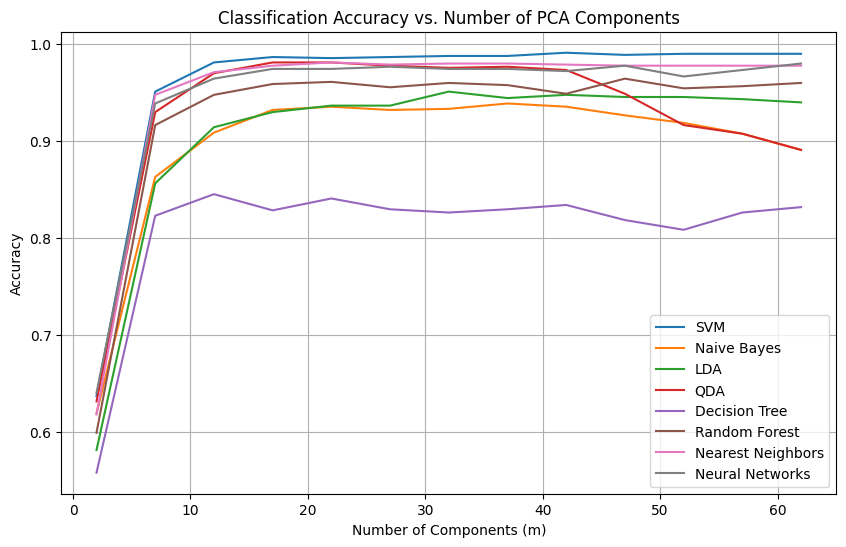

In [ ]:
# Plot the results for better analysis
plt.figure(figsize=(10, 6))
for classifier in names:
    plt.plot(components_range, [pca_results[m][classifier] for m in components_range], label=classifier)

plt.xlabel('Number of Components (m)')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy vs. Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()

(898, 64)


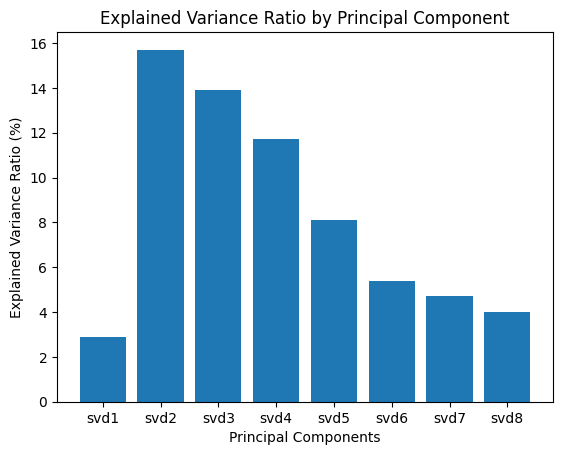

SVM: 0.9254727474972191
Naive Bayes: 0.8687430478309233
LDA: 0.8676307007786429
QDA: 0.92880978865406
Decision Tree: 0.8576195773081201
Random Forest: 0.9199110122358176
Nearest Neighbors: 0.9532814238042269
Neural Networks: 0.9454949944382648


,score
0,0.925473
1,0.868743
2,0.867631
3,0.928810
4,0.857620
5,0.919911
6,0.953281
7,0.945495


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# Load Digits dataset
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
df = pd.DataFrame(X_train)
print(df.shape)
# Fit and transform data using svd
svd_model = TruncatedSVD(n_components=8)  # You can adjust the number of components
X_train_svd = svd_model.fit_transform(X_train)
X_test_svd = svd_model.transform(X_test)
# Plot explained variance ratio
pe = np.round(svd_model.explained_variance_ratio_ * 100, decimals=1)
labels = ['svd' + str(x) for x in range(1, len(pe) + 1)]
plt.bar(x=range(1, len(pe) + 1), height=pe, tick_label=labels)
plt.ylabel('Explained Variance Ratio (%)')
plt.xlabel('Principal Components')
plt.title("Explained Variance Ratio by Principal Component")
plt.show()

# Define classifiers
names = ["SVM", "Naive Bayes", "LDA", "QDA", "Decision Tree", "Random Forest", "Nearest Neighbors", "Neural Networks"]
classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]
# Perform classification and display scores
s = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_svd, y_train)
    score = clf.score(X_test_svd, y_test)
    s.append(score)
    print(name + ": " + str(score))
# Display scores in a DataFrame
classify = pd.DataFrame(data=s, columns=['score'])
classify.head(8)

In [ ]:
from re import S
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Digits dataset
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Original Data: Define classifiers and calculate accuracy
names = ["SVM", "Naive Bayes", "LDA", "QDA", "Decision Tree", "Random Forest", "Nearest Neighbors", "Neural Networks"]

original_classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

original_scores = {}
for name, clf in zip(names, original_classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    original_scores[name] = score

# Save original scores to a DataFrame
original_classify = pd.DataFrame(data=original_scores.items(), columns=['Classifier', 'Original Score'])

# Define classifiers for svd-based classification
svd_classifiers = [
    SVC(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(alpha=1, max_iter=1000)
]

# Perform classification with svd for different values of m
svd_results = {}
components_range = range(1, 9)  # Adjust the range as needed

for m in components_range:
    svd_model = TruncatedSVD(n_components=m)
    X_train_svd = svd_model.fit_transform(X_train)
    X_test_svd = svd_model.transform(X_test)

    svd_scores = {}
    for name, clf in zip(names, svd_classifiers):
        clf.fit(X_train_svd, y_train)
        score = clf.score(X_test_svd, y_test)
        svd_scores[name] = score

    svd_results[m] = svd_scores

# Save SVD results to a DataFrame
svd_classify = pd.DataFrame({f'svd-{m} Components': scores for m, scores in svd_results.items()})

# Display original and svd scores in a DataFrame
combined_classify = pd.concat([original_classify, svd_classify], axis=1)

# Save the combined results to a CSV file
combined_classify.to_csv('classification_results_combined.csv', index=False)

# DRAW TABLE
svd_classify.head(7)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,svd-1 Components,svd-2 Components,svd-3 Components,svd-4 Components,svd-5 Components,svd-6 Components,svd-7 Components,svd-8 Components
SVM,0.147942,0.404894,0.646274,0.721913,0.827586,0.886541,0.889878,0.925473
Naive Bayes,0.147942,0.421580,0.636263,0.682981,0.775306,0.836485,0.829811,0.868743
LDA,0.147942,0.393771,0.609566,0.675195,0.755284,0.823137,0.827586,0.867631
QDA,0.149055,0.426029,0.662959,0.736374,0.830923,0.896552,0.904338,0.929922
Decision Tree,0.113459,0.313682,0.579533,0.695217,0.771969,0.850945,0.838710,0.856507
Random Forest,0.113459,0.369299,0.666296,0.745273,0.837597,0.884316,0.906563,0.925473
Nearest Neighbors,0.139043,0.391546,0.661846,0.770857,0.842047,0.908788,0.924360,0.953281


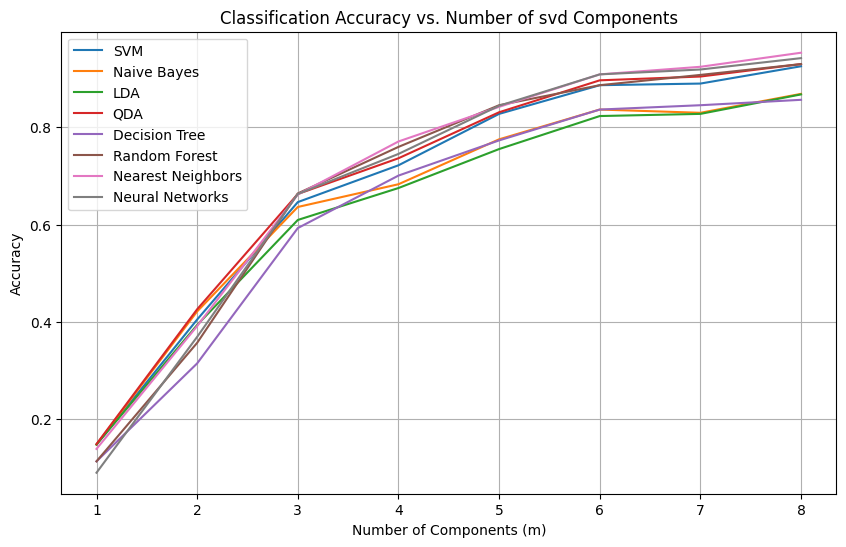

In [ ]:
# Plot the results for better analysis
plt.figure(figsize=(10, 6))
for classifier in names:
    plt.plot(components_range, [svd_results[m][classifier] for m in components_range], label=classifier)

plt.xlabel('Number of Components (m)')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy vs. Number of svd Components')
plt.legend()
plt.grid(True)
plt.show()